This code is a simplified version of the diabetes project I worked on on a previous notebook. In my previous work I went more in depth into visualizations and understanding which features affect the most for a person to get accurately predicted as diabetic or not. This dataset concerns who suffer from diabetes and it is a classification machine learning problem since the output is binary (0: non diabetic, 1: diabetic). For this project, I will use the K-NN ML model for classification

## Importing libraries for the project

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Pre-processing

In [2]:
#Reading the dataset
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Statistical data
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#No missing values
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

   ## Correlation

In [5]:
#Find correlation between features
corr = df_diabetes.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

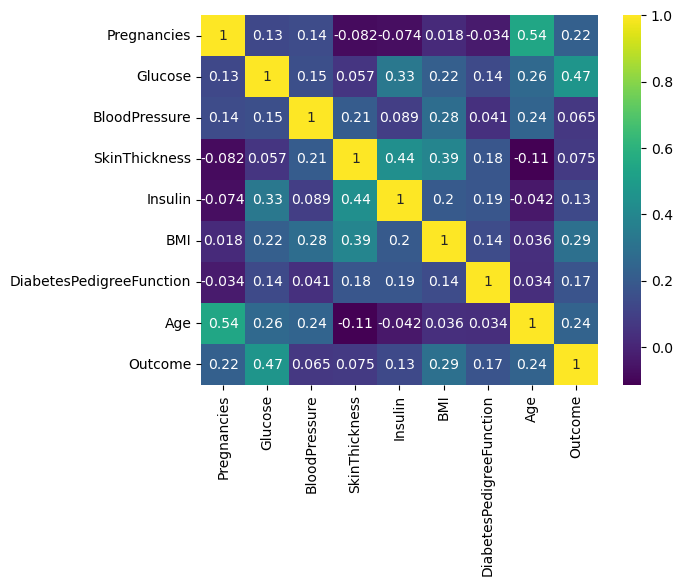

In [6]:
#Visualizing the correlations using seaborn
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        cbar=True ,cmap='viridis', annot=True)

In [7]:
#Splitting the data into 2 categories
#X for the features or dependent variables
#Y for the independent variable or the outcome
X = df_diabetes[['Glucose', 'BMI','Pregnancies', 'DiabetesPedigreeFunction']]
Y = df_diabetes['Outcome']

In [8]:
print(X)
print(Y)

     Glucose   BMI  Pregnancies  DiabetesPedigreeFunction
0        148  33.6            6                     0.627
1         85  26.6            1                     0.351
2        183  23.3            8                     0.672
3         89  28.1            1                     0.167
4        137  43.1            0                     2.288
..       ...   ...          ...                       ...
763      101  32.9           10                     0.171
764      122  36.8            2                     0.340
765      121  26.2            5                     0.245
766      126  30.1            1                     0.349
767       93  30.4            1                     0.315

[768 rows x 4 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [9]:
#We use the 'StandardScaler' library to standarsize the data for X
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [10]:
standardized_data = scaler.transform(X)

In [11]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.84832379  0.20401277  0.63994726  0.46849198]
 [-1.12339636 -0.68442195 -0.84488505 -0.36506078]
 [ 1.94372388 -1.10325546  1.23388019  0.60439732]
 ...
 [ 0.00330087 -0.73518964  0.3429808  -0.68519336]
 [ 0.1597866  -0.24020459 -0.84488505 -0.37110101]
 [-0.8730192  -0.20212881 -0.84488505 -0.47378505]]


## Train test split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 4)

In [13]:
# K-NN machine learning model
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [14]:
Y_pred = knn.predict(X_test)

/Users/riadanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
print("Accuracy with k=4", accuracy_score(Y_test, Y_pred)*100, "%")

Accuracy with k=4 74.02597402597402 %


## Predictive system

In [30]:
input_data = (137,43.1,0,2.288) #Example of diabetic person => = 1

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/Users/riadanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/riadanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Saving the training model

In [17]:
#We use pickle libraries to save our ML models
import pickle

In [18]:
#We are writing or dumping the model into this new file called 'trained_model.sav'
#wb: write binary
filename = 'trained_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [19]:
#Then we will load the model
#rb: Read binary
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [29]:
input_data = (137,43.1,0,2.288) #Example of diabetic person => = 1

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#We used the loaded model for prediction
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/Users/riadanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/riadanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
